In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_excel('extention_ZAlizadeh_san_preprocessed.xlsx') 

In [40]:
del df['Unnamed: 0']

In [41]:
del df['Exertional CP']

In [42]:
df = pd.DataFrame(df) 

In [43]:
df.drop(df.iloc[:, 49:58], inplace = True, axis = 1)

In [44]:
df.head(10)

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,TG,LDL,HDL,BUN,ESR,HB,K,Na,WBC,Lymph
0,53,90,175,1,29.387755,0,1,1,0,0,...,250,155,30.0,8,7,15.6,4.7,141,5700,39
1,67,70,157,2,28.398718,0,1,0,0,0,...,309,121,36.0,30,26,13.9,4.7,156,7700,38
2,54,54,164,1,20.077335,0,0,1,0,0,...,103,70,45.0,17,10,13.5,4.7,139,7400,38
3,66,67,158,2,26.838648,0,1,0,0,0,...,63,55,27.0,30,76,12.1,4.4,142,13000,18
4,50,87,153,2,37.165193,0,1,0,0,0,...,170,110,50.0,16,27,13.2,4.0,140,9200,55
5,50,75,175,1,24.489796,0,0,1,0,0,...,139,119,34.0,13,18,15.6,4.2,141,7300,26
6,55,80,165,1,29.384757,0,0,0,1,0,...,83,85,34.0,12,38,14.1,4.8,139,9400,58
7,72,80,175,1,26.122449,1,0,1,0,0,...,80,90,55.0,19,4,16.1,4.3,142,12200,25
8,58,84,163,2,31.615793,0,0,0,0,0,...,79,90,59.0,15,5,11.6,3.4,139,5100,49
9,60,71,170,1,24.567474,1,0,0,0,0,...,80,90,44.0,16,8,13.9,4.6,140,4900,55


In [45]:
X = np.array(df.iloc[:,1].values).reshape((-1, 1))
y = np.array(df.iloc[:,47].values)#WBС - количество лейкоцитов

In [46]:
print (df.shape, X.shape, y.shape)

(303, 49) (303, 1) (303,)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = False)

In [48]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<AxesSubplot:>

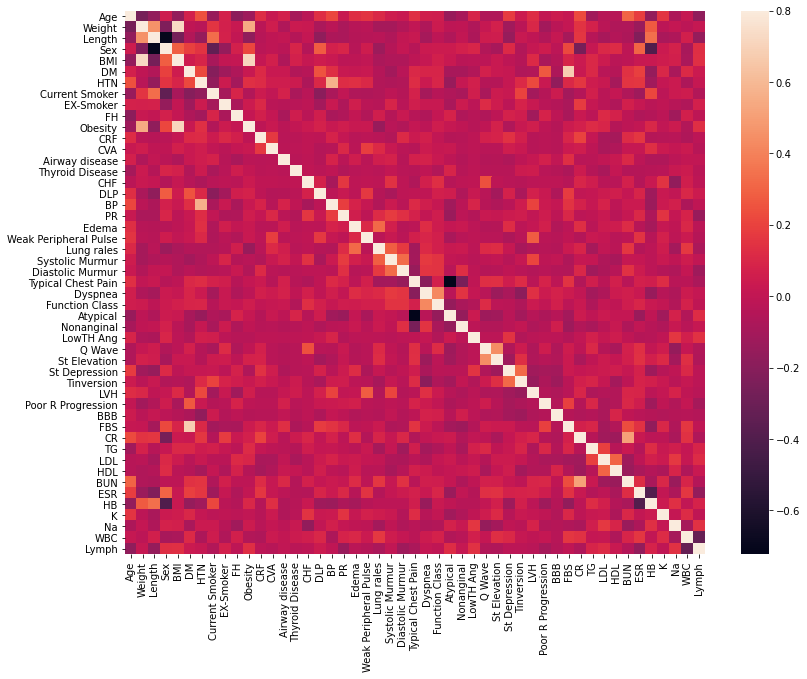

In [49]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), vmax=0.8)

# Линейная регрессия

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [51]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [52]:
print ('R2:',r2_score(y_test, y_pred))
print ('Mean Square Error(MSE):',mean_squared_error(y_test, y_pred, squared=False))
print ('Root Mean Square Error(RMSE):',sqrt(mean_squared_error(y_test, y_pred, squared=False)))
print ('mean absolute error (MAE):',mean_absolute_error(y_test, y_pred))

R2: -0.00013320787388759747
Mean Square Error(MSE): 2274.0877129890155
Root Mean Square Error(RMSE): 47.68739574551137
mean absolute error (MAE): 1768.3031208221555


# Регрессия дерева решений

In [93]:
from sklearn.tree import DecisionTreeRegressor

In [94]:
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [95]:
y_pred=model.predict(X_test)

In [96]:
print ('R2:',r2_score(y_test, y_pred))
print ('Mean Square Error(MSE):',mean_squared_error(y_test, y_pred, squared=False))
print ('Root Mean Square Error(RMSE):',sqrt(mean_squared_error(y_test, y_pred, squared=False)))
print ('mean absolute error (MAE):',mean_absolute_error(y_test, y_pred))

R2: -0.5414670425921781
Mean Square Error(MSE): 2823.224471129688
Root Mean Square Error(RMSE): 53.134023667793954
mean absolute error (MAE): 2166.051171051171


# LASSO

In [57]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [90]:
model = Lasso(alpha=1.0)
model.fit(X_train, y_train)

Lasso()

In [91]:
y_pred=model.predict(X_test)

In [92]:
print ('R2:',r2_score(y_test, y_pred))
print ('Mean Square Error(MSE):',mean_squared_error(y_test, y_pred, squared=False))
print ('Root Mean Square Error(RMSE):',sqrt(mean_squared_error(y_test, y_pred, squared=False)))
print ('mean absolute error (MAE):',mean_absolute_error(y_test, y_pred))

R2: -0.00012185004137532651
Mean Square Error(MSE): 2274.0748003187387
Root Mean Square Error(RMSE): 47.68726035660613
mean absolute error (MAE): 1768.1907848061842


# Гребневая регрессия

In [61]:
from sklearn.linear_model import Ridge

In [81]:
model=Ridge(alpha=1.0)
model.fit(X_train, y_train)

Ridge()

In [82]:
y_pred=model.predict(X_test)

In [83]:
print ('R2:',r2_score(y_test, y_pred))
print ('Mean Square Error(MSE):',mean_squared_error(y_test, y_pred, squared=False))
print ('Root Mean Square Error(RMSE):',sqrt(mean_squared_error(y_test, y_pred, squared=False)))
print ('mean absolute error (MAE):',mean_absolute_error(y_test, y_pred))

R2: -0.000130083121311797
Mean Square Error(MSE): 2274.0841604787433
Root Mean Square Error(RMSE): 47.68735849760126
mean absolute error (MAE): 1768.2725786414217


# Elastic Net регрессия

In [75]:
from sklearn.linear_model import ElasticNetCV

In [77]:
model = ElasticNetCV(cv=5, random_state=0)
model.fit(X_train, y_train)

ElasticNetCV(cv=5, random_state=0)

In [78]:
y_pred=model.predict(X_test)

In [79]:
print ('R2:',r2_score(y_test, y_pred))
print ('Mean Square Error(MSE):',mean_squared_error(y_test, y_pred, squared=False))
print ('Root Mean Square Error(RMSE):',sqrt(mean_squared_error(y_test, y_pred, squared=False)))
print ('mean absolute error (MAE):',mean_absolute_error(y_test, y_pred))

R2: -8.74339763436982e-05
Mean Square Error(MSE): 2274.03567239671
Root Mean Square Error(RMSE): 47.68685009933777
mean absolute error (MAE): 1761.7976363259381


# Ссылки

https://mcs.mail.ru/blog/-5-algoritmov-regressii-v-mashinnom-obuchenii \
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html \
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html \
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html \
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html \
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html